In [13]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

In [14]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [15]:
from modsim import *

In [23]:
from chap03 import step

In [16]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/chap03.py')

In [17]:
from numpy import sqrt

root_2 = sqrt(2)
root_2

1.4142135623730951

In [18]:
bikeshare = State(olin=10, wellesley=2)
bikeshare

olin         10
wellesley     2
Name: state, dtype: int64

For example, when you run step, it updates a State object, but it doesn't return a value.

To write functions that return values, we can use a return statement, like this:<br>`add_five` takes a parameter, `x`, which could be any number. It
computes `x + 5` and returns the result. So if we run it like this, the
result is `8`:

In [19]:
def add_five(x):
    return x + 5

In [20]:
add_five(3)

8

As a more useful example, here's a version of `run_simulation` that
creates a `State` object, runs a simulation, and then returns the
`State` object:

In [24]:
def run_simulation(p1, p2, num_steps):
    state = State(olin=10, wellesley=2,
                  olin_empty=0, wellesley_empty=0)

    for i in range(num_steps):
        step(state, p1, p2)

    return state

In [25]:
final_state = run_simulation(0.3, 0.2, 60)

In [26]:
print(final_state.olin_empty,
      final_state.wellesley_empty)

0 2



The simulation we just ran starts with olin=10 and wellesley=2, and uses the values p1=0.3, p2=0.2, and num_steps=60. These five values are parameters of the model, which are quantities that determine the behavior of the system.

It is easy to get the parameters of a model confused with the parameters of a function. It is especially easy because the parameters of a model often appear as parameters of a function.

For example, the previous version of run_simulation takes p1, p2, and num_steps as parameters. So we can call run_simulation with different parameters and see how the metrics, like the number of unhappy customers, depend on the parameters. But before we do that, we need a new version of a for loop.

In [27]:
from numpy import linspace

p1_array = linspace(0, 1, 5)
p1_array

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

The arguments indicate where the sequence should start and stop, and how many elements it should contain. In this example, the sequence contains 5 equally-spaced numbers, starting at 0 and ending at 1.

The result is a NumPy array, which is a new kind of object we have not seen before. An array is a container for a sequence of numbers.

We can use an array in a for loop like this:

In [28]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


In [29]:
p1_array = linspace(0, 0.6, 6)
p2 = 0.2
num_steps = 60

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    print(p1, final_state.olin_empty)

0.0 0
0.12 0
0.24 0
0.36 0
0.48 10
0.6 21


In [30]:
sweep = SweepSeries()


In [31]:
p1_array = linspace(0, 0.6, 31)

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p1] = final_state.olin_empty

In [32]:
show(sweep)

,Metric
Parameter,
0.00,0
0.02,0
0.04,0
0.06,0
0.08,0
0.10,0
0.12,0
0.14,0
0.16,0


We can plot the elements of the `SweepSeries` like this:

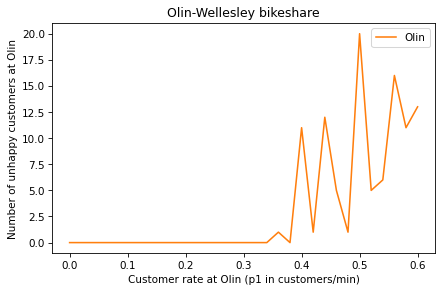

In [33]:
sweep.plot(label='Olin', color='C1')

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Customer rate at Olin (p1 in customers/min)',
         ylabel='Number of unhappy customers at Olin')

Exercise 1
Write a function called make_state that creates a State object with the state variables olin=10 and wellesley=2, and then returns the new State object.

Write a line of code that calls make_state and assigns the result to a variable named init.

In [34]:
def make_state():
    state = State(olin=10, wellesley=2)
    return state
init = make_state()
show(init)

,state
olin,10
wellesley,2


Exercise 2

In [35]:
p1_array = linspace(0, 1, 101)


Exercise 3<br>
Wrap the code from this chapter in a function named sweep_p1 that takes an array called p1_array as a parameter. It should create a new SweepSeries and run a simulation for each value of p1 in p1_array, with p2=0.2 and num_steps=60. It should store the results in the SweepSeries and return it.

In [36]:
def sweep_p1(p1_array):
    p2 = 0.2
    num_steps = 60
    sweep = SweepSeries()

    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p1] = state.olin_empty

    return sweep

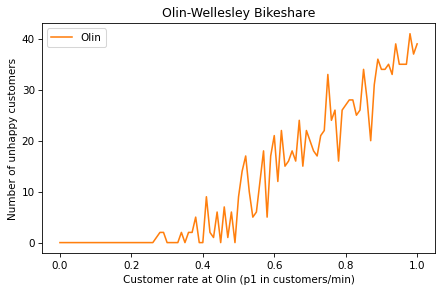

In [37]:
p1_array = linspace(0, 1, 101)
sweep2 = sweep_p1(p1_array)
sweep2.plot(label='Olin', color='C1')
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Customer rate at Olin (p1 in customers/min)',
         ylabel='Number of unhappy customers')

Exercise 4<br>
Write a function called sweep_p2 that runs simulations with p1=0.5 and a range of values for p2. It should store the results in a SweepSeries and return the SweepSeries.

In [38]:
def sweep_p2(p2_array):
    p1 = 0.5
    num_steps = 60
    sweep = SweepSeries()

    for p2 in p2_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p2] = state.olin_empty

    return sweep

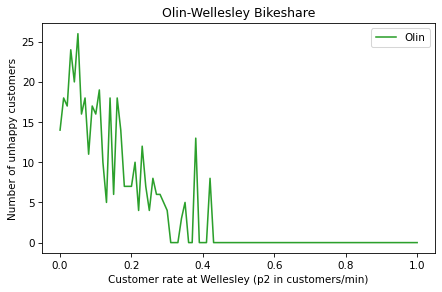

In [39]:
p2_array = linspace(0, 1, 101)
sweep3 = sweep_p2(p2_array)
sweep3.plot(label='Olin', color='C2')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Customer rate at Wellesley (p2 in customers/min)',
         ylabel='Number of unhappy customers')

Exercise 5<br>
Write a function called run_multiple_simulations that takes as parameters p1, p2, num_steps, and num_runs. num_runs specifies how many times it should call run_simulation.Display the resulting TimeSeries and use the mean function from NumPy to compute the average number of unhappy customers.



In [40]:
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10

In [41]:

def run_multiple_simulations(p1, p2, num_steps, num_runs):
    totals = TimeSeries()

    for i in range(num_runs):
        state = run_simulation(p1, p2, num_steps)
        totals[i] = state.olin_empty + state.wellesley_empty

    return totals

In [42]:
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
totals = run_multiple_simulations(p1, p2, num_steps, num_runs)
show(totals)

,Quantity
Time,
0,6
1,0
2,0
3,0
4,0
5,0
6,2
7,2
8,0


In [43]:
from numpy import mean

mean(totals)

1.0

Exercise 6<br>
Continuing the previous exercise, use run_multiple_simulations to run simulations with a range of values for p1 and p2.

In [44]:
p2 = 0.3
num_steps = 60
num_runs = 20
p1_array = linspace(0, 1, 20)
p2 = 0.3
num_steps = 60
num_runs = 20

sweep4 = SweepSeries()
for p1 in p1_array:
    totals = run_multiple_simulations(p1, p2, num_steps, num_runs)
    sweep4[p1] = mean(totals)

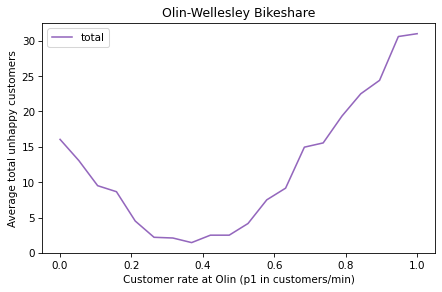

In [45]:
sweep4.plot(label='total', color='C4')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Customer rate at Olin (p1 in customers/min)',
         ylabel='Average total unhappy customers')

Under the Hood
The object you get when you call SweepSeries is actually a Pandas Series, the same as the object you get from TimeSeries. I give them different names to help us remember that they play different roles.

In [46]:
    totals.mean()


31.0